In [4]:
import sys
sys.path.append("../")
from utils import data_utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 18.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [5]:
#加载cifar10数据集
cifar10_dir = '../datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

('Training data shape: ', (50000, 32, 32, 3))
('Training labels shape: ', (50000,))
('Test data shape: ', (10000, 32, 32, 3))
('Test labels shape: ', (10000,))


In [25]:
num_train = X_train.shape[0]
num_test= X_test.shape[0]
X_train_dense = X_train.reshape((num_train, -1))
X_test_dense = X_test.reshape((num_test, -1))
num_inputs = X_train_dense.shape[1]
num_outputs = 10

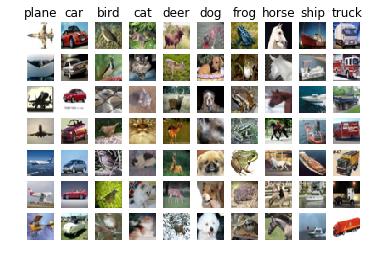

In [21]:
#可视化图像
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [30]:
def net(X, W, b):
    return np.dot(X, W) + b
def relu(X):
    return np.maximum(X, 0)
def softmax(X):
    X_max = np.max(X, axis=1)
    X = X - X_max
    X_exp = np.power(np.e, X)
    partition = np.sum(X_exp, axis=1)
    return X_exp / partition

In [28]:
W = np.random.normal(size=(num_inputs, num_outputs))
b = np.zeros(shape=(num_outputs,))

In [29]:
def softmax_loss(yhat, y):
    """TODO::softmax loss
    """
def dw():
    """TODO::w的偏导
    """
    pass
def db():
    """TODO::b的偏导
    """
    pass
def SGD(W, b, learning_rate, dw, db):
    """TODO::随机梯度下降算法
    """
    pass


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
from neural_net import TwoLayerNet

In [135]:
num_hiddens = 100
net  = TwoLayerNet(num_inputs, num_hiddens, num_outputs)
stats = net.train(X_train_dense, y_train, X_test_dense, y_test,
                  num_iters=2000, batch_size=400,
                  learning_rate=1e-4, learning_rate_decay=0.95,
                  reg=0.25, verbose=True)

iteration 0 / 2000: loss 2.303399
iteration 100 / 2000: loss 2.295274
iteration 200 / 2000: loss 2.252066
iteration 300 / 2000: loss 2.151585
iteration 400 / 2000: loss 2.056055
iteration 500 / 2000: loss 2.061689
iteration 600 / 2000: loss 1.977688
iteration 700 / 2000: loss 1.931419
iteration 800 / 2000: loss 1.941813
iteration 900 / 2000: loss 1.973654
iteration 1000 / 2000: loss 1.929947
iteration 1100 / 2000: loss 1.874955
iteration 1200 / 2000: loss 1.940056
iteration 1300 / 2000: loss 1.821635
iteration 1400 / 2000: loss 1.898307
iteration 1500 / 2000: loss 1.864772
iteration 1600 / 2000: loss 1.899298
iteration 1700 / 2000: loss 1.807312
iteration 1800 / 2000: loss 1.830337
iteration 1900 / 2000: loss 1.786430


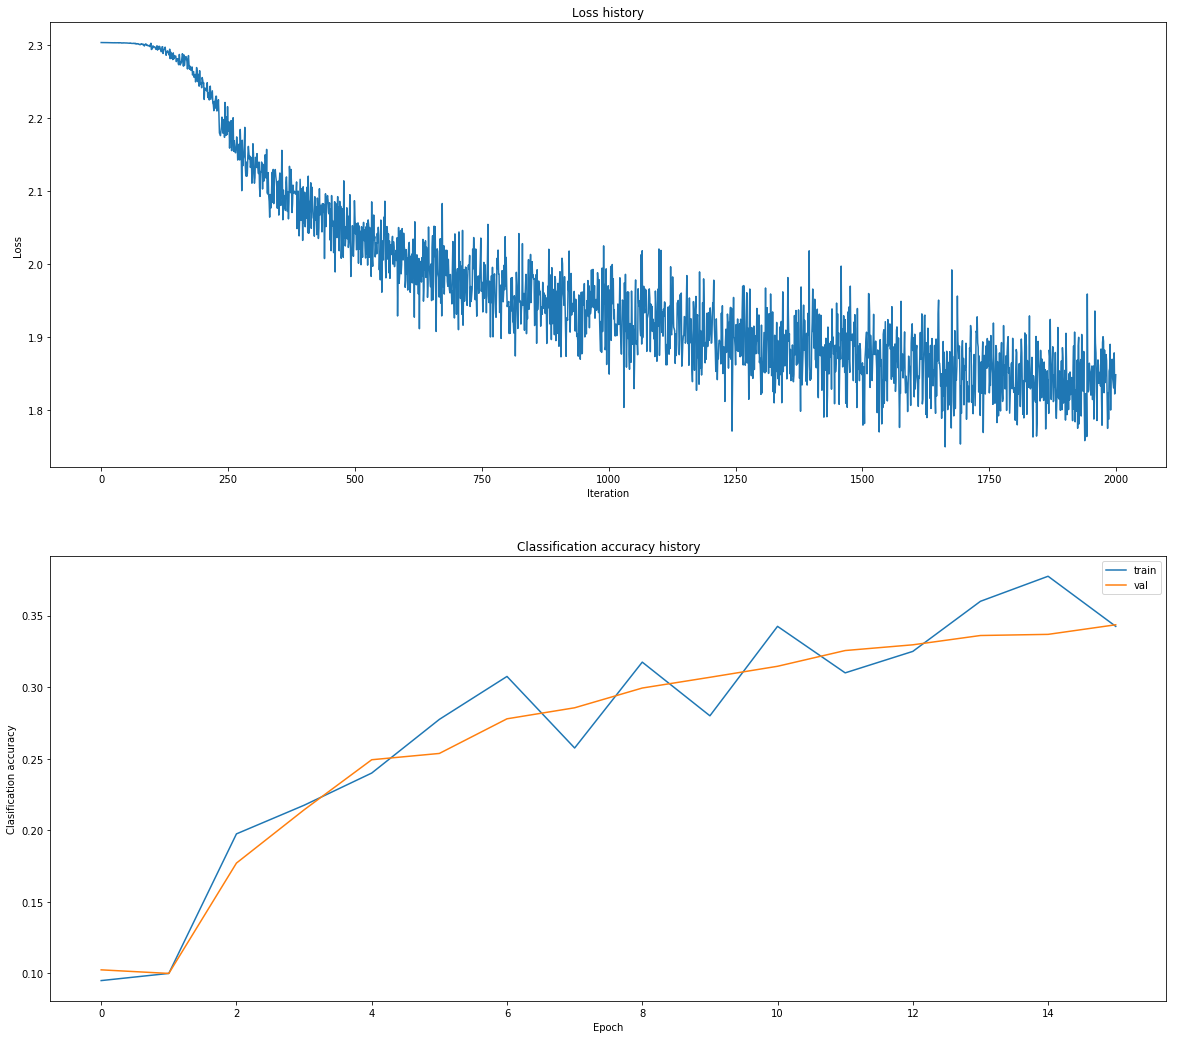

In [142]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
#plt.ylim(min(stats['loss_history']), max(stats['loss_history']), )

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [143]:
val_acc = (net.predict(X_test_dense) == y_test).mean()
print('Validation accuracy: ', val_acc)

('Validation accuracy: ', 0.3454)


In [118]:
best_net = None # store the best model into this 

best_val = -1
best_stats = None
learning_rates = [1e-2, 1e-3]
regularization_strengths = [0.4, 0.5, 0.6]
results = {} 
iters = 2000 #100
for lr in learning_rates:
    for rs in regularization_strengths:
        net = TwoLayerNet(num_inputs, num_hiddens, num_outputs)

        # Train the network
        stats = net.train(X_train_dense, y_train, X_test_dense, y_test,
                    num_iters=iters, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=rs)
        
        y_train_pred = net.predict(X_train_dense)
        acc_train = np.mean(y_train == y_train_pred)
        y_val_pred = net.predict(X_test_dense)
        acc_val = np.mean(y_test == y_val_pred)
        
        results[(lr, rs)] = (acc_train, acc_val)
        
        if best_val < acc_val:
            best_stats = stats
            best_val = acc_val
            best_net = net
            
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print(lr, reg, train_accuracy, val_accuracy)
    #print "lr %f reg %f train accuracy: %f val accuracy: %f" % (lr, reg, train_accuracy, val_accuracy)
print(best_val)  

(0.001, 0.4, 0.28862, 0.2798)
(0.001, 0.5, 0.2439, 0.2396)
(0.001, 0.6, 0.2991, 0.3042)
(0.01, 0.4, 0.1, 0.1)
(0.01, 0.5, 0.1, 0.1)
(0.01, 0.6, 0.1, 0.1)
0.3042


In [120]:
test_acc = (best_net.predict(X_test_dense) == y_test).mean()
print('Test accuracy: ', test_acc)

('Test accuracy: ', 0.3042)
